# Oscillation in eeg 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp

import mne 

warnings.filterwarnings('ignore')

Pas µV mais des mV 
Sampling rate = 250 Hz 
Filtre harr wavelet filter 
cut le sigal en plusieurs petites parties => 2 avant le gap 
durée totale aproximativement 1h30

In [3]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'


## 1 Plot les data brutes 

### 1.1 Etude sur 10 min avec les données bruts 

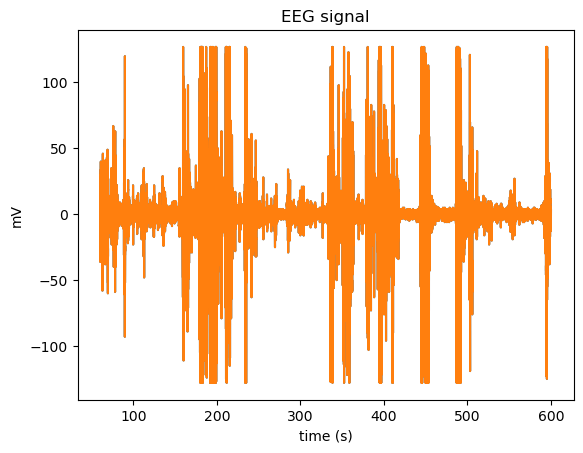

In [18]:
start = 60 # in seconds
end = 600 # in seconds 
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
df = df.iloc[int(start*sampling_rate):int(end*sampling_rate)] # Si on veut ne sélectionner qu'une partie du signal 
df['time'] = df.index * time
df.rename(columns={'0': 'mV'}, inplace=True)
plt.plot(df['time'], df['mV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('mV')
plt.title('EEG signal')
plt.show()

### 1.2 Test with mne 

Creating RawArray with float64 data, n_channels=1, n_times=135000
    Range : 0 ... 134999 =      0.000 ...   539.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


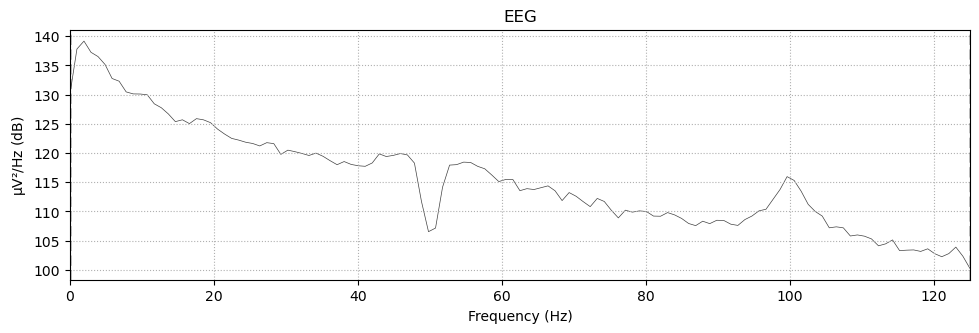

In [19]:
import numpy as np 
data = np.array([df['mV']])
info = mne.create_info(ch_names=['eeg'],
                       ch_types=['eeg'],
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot_psd()

### 1.3 Ajout des données du choice phase 

In [30]:
start = 5000 # in seconds
end = 5540 # in seconds 
df_choice = pd.read_csv('../data/EEGArchi13mPFC.txt')
df_choice = df_choice.iloc[int(start*sampling_rate):int(end*sampling_rate)]
df_choice['time'] = df_choice.index * time
df_choice.rename(columns={'0': 'mV'}, inplace=True)
# plt.plot(df_choice['time'], df_choice['mV'])
# plt.xlabel(f'time ({unit_time})')
# plt.ylabel('mV')
# plt.title('EEG signal')
# plt.show()

### 1.4 Plot les data brutes avec les données du sample phase et du choice phase

Creating RawArray with float64 data, n_channels=2, n_times=135000
    Range : 0 ... 134999 =      0.000 ...   539.996 secs
Ready.
Effective window size : 4.000 (s)


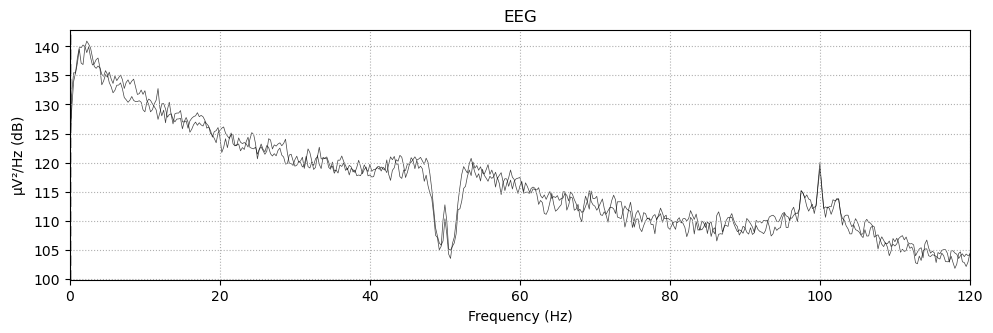

In [44]:
data = np.array([df['mV'], df_choice['mV']])
info = mne.create_info(ch_names=['eeg 01',"eeg 02"],
                       ch_types=['eeg']*2,
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.compute_psd(method ='auto', fmin=0, fmax=120, n_fft=1000).plot()

Ici on ne vois pas de grande différences entre les deux phases d'analyses (sample & choice)

On a chercher a changer les couleur mais ça fonctionne pas

## 2 filtering 

### 2.1 FIlter the data with Harr wavelet filter

A implémenter 

## 3 Fourrier transform 

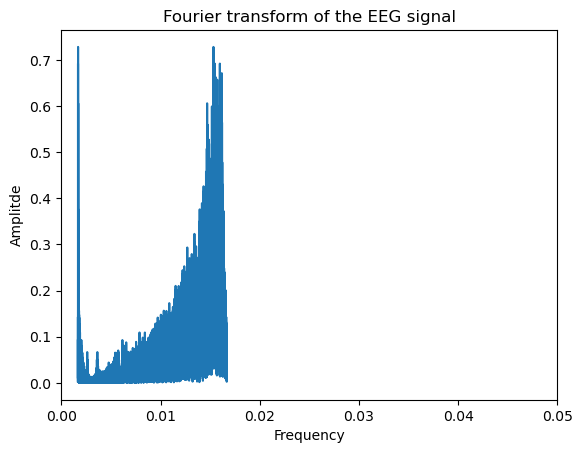

In [8]:
import scipy as sp 
import scipy.fftpack
import numpy as np

df_f = df.copy()
df_f['amplitude'] = sp.fftpack.fft(df_f['mV'])/len(df_f['mV'])
df_f["freq"] = 1/df_f['time']
plt.plot(df_f['freq'], np.abs(df_f['amplitude']))
plt.xlabel(f'Frequency')
plt.xlim(0, 0.05)
plt.ylabel('Amplitde')
plt.title('Fourier transform of the EEG signal')
plt.show()

Pas très beau mais pas finis encore 